# 1.Introduction

This case study is the Capstone Project of Google Data Analytics Professional Certificate . In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From the insights, our team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 2.Ask

- **How do annual members and casual riders use Cyclistic bikes differently?**

# 3.Prepare

**Data Source and Scope:**

The analysis conducted for this study utilized historical trip data provided by Cyclistic, a fictional company, accessible at [Cyclistic’s Historical Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html). The dataset encompasses the preceding twelve-month period, from January 1, 2024, to December 31, 2024. This timeframe allows for the identification of relevant trends within a complete annual cycle.

**Data Structure and Organization:**

The raw data is structured and organized into twelve distinct Comma Separated Values (.csv) files, with each file containing the trip records for a single month. This format facilitates efficient data processing and analysis. While the dataset names are specific to this fictional case study, the data provided is deemed appropriate for the analytical objectives.

**Data Provenance and Licensing:**

The data utilized in this analysis was made publicly available by Motivate International Inc. under the terms outlined in [this agreement](https://divvybikes.com/data-license-agreement). This clearly establishes the source and usage rights associated with the dataset.

**Data Quality Assessment (ROCCC):**

Based on the available information, the dataset exhibits characteristics of Reliable, Original, Current, and Cited (ROCC). As this data is collected by a real bike-sharing operation in Chicago, concerns regarding inherent bias or credibility are minimal. However, it is important to note that the dataset may not be entirely Comprehensive, as certain information appears to be absent.

**Data Integrity:**

The available data demonstrates Accuracy, Consistency, and Trustworthiness, suggesting a high level of data integrity suitable for analytical purposes.

**Limitations:**

Despite the overall quality of the data, certain limitations were encountered:

* **Data Privacy Restrictions:** Due to data privacy regulations, personally identifiable information of riders is not included in the dataset. This constraint prevents the analysis of potential correlations between single-pass purchases and the residential location of casual riders within the Cyclistic service area, as well as the identification of users purchasing multiple single passes.
* **Absence of Financial Transaction Data:** Detailed financial information, such as individual ride ticket fares associated with each Ride ID, is not available within the dataset.
* **Impact of Missing Financial Data:** The absence of financial transaction data restricts the ability to directly compare the total expenditure of casual riders with the potential cost of an annual membership. Such an analysis could have provided valuable insights into the economic viability of different user segments.
* **Limited Scope of Bicycle Types:** The dataset does not include information regarding the usage of specialized bicycle types such as reclining bikes, hand tricycles, and cargo bikes. It has been reported that approximately 8% of total riders utilize these assistive options, suggesting a potential gap in the comprehensiveness of the data regarding diverse user needs.

# 4.Process

## 4.1 libareries used


In [9]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#inline matplotlib
import plotly.express as px
import seaborn as sns
from scipy import stats

## 4.2 Functions used

In [10]:
def loading_data():
    '''this function loads the data from the csv file
        that is in the current directory
        and returns the data as a pandas dataframe
        input: none
        process: reads the csv file in the current directory
        output: pandas dataframe'''
    # Get a list of all CSV files in the current directory
    csv_files = glob.glob('*.csv') 

    if not csv_files:
        print("No CSV files found in the current directory.")
    else:
        # Create an empty list to store DataFrames
        dfs = []

        # Iterate through each CSV file
        for file in csv_files:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file)
            # Append the DataFrame to the list
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        combined_df = pd.concat(dfs, ignore_index=True)

        # Print the first few rows of the combined DataFrame
    return combined_df


def extract_datetime_features(df,starttime,endtime):
    '''this function converting data into datetime object and
        gets from the first column the year , month , day and
         weekday name also the duration of the trip in minutes format

        input: datafram,first column of date , second column of date
        process: converting the data from object to datetime format
                also getting year,month, day and
                weekday name also the duration of the trip in minutes
        output: pandas dataframe'''
        
    df[starttime] = pd.to_datetime(df[starttime], format='mixed',dayfirst=True)
    df[endtime] = pd.to_datetime(df[endtime],format='mixed',dayfirst=True)
    df['Month'] = df[starttime].dt.month_name()
    df['Day'] = df[starttime].dt.day
    df['Weekday'] = df[starttime].dt.day_name()
    df['Hour'] = df[starttime].dt.hour
    df['duration'] = (df[endtime].dt.minute-df[starttime].dt.minute).abs()
    return df


In [11]:
# loading and seeing the dataframe
data = loading_data()
data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


## 4.3 cleaning process

In [12]:
# checking data types and informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB


In [13]:
# checking the data of null values
nulls = data.isnull().sum()
nulls

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

In [14]:
# dropping the columns that are not needed for the analysis
columns_to_drop = ['end_lat','end_lng','start_lat','start_lng','end_station_id','start_station_id','start_station_name','end_station_name']

data = data.drop(columns=columns_to_drop,axis=1)



In [15]:
# Transforming the datetime formate columns
extract_datetime_features(data,'started_at','ended_at')

data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,Month,Day,Weekday,Hour,duration
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,member,January,12,Friday,15,7
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,member,January,8,Monday,15,7
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,member,January,27,Saturday,12,8
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,member,January,29,Monday,16,30
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,member,January,31,Wednesday,5,34


In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with ordered categories
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)


In [17]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Weekday' column to categorical with ordered categories
data['Weekday'] = pd.Categorical(data['Weekday'], categories=weekday_order, ordered=True)


In [18]:
# clean data that contain false values as less than 1 minute is false records
data = data[data['duration'] > 1]
data = data.reset_index()
data = data.drop(columns=['index'])

data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,Month,Day,Weekday,Hour,duration
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,member,January,12,Friday,15,7
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,member,January,8,Monday,15,7
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,member,January,27,Saturday,12,8
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,member,January,29,Monday,16,30
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,member,January,31,Wednesday,5,34


# 5.Analyse & Share

## Explonatary data analysis

In [19]:
# Explonatary data analysis
# descriptive statistics of numeric values
data.describe().T

,count,mean,min,25%,50%,75%,max,std
started_at,5658651,2024-07-17 11:55:44.215843072,2024-01-01 00:00:39,2024-05-21 00:02:24.500000,2024-07-23 08:02:42.608000,2024-09-18 07:50:54.845000192,2024-12-31 23:54:37.045000,NaN
ended_at,5658651,2024-07-17 12:11:24.272127232,2024-01-01 00:04:20,2024-05-21 00:28:44,2024-07-23 08:13:41.932000,2024-09-18 08:01:38.862500096,2024-12-31 23:59:55.705000,NaN
Day,5658651.0,15.634616,1.0,8.0,16.0,23.0,31.0,8.746042
Hour,5658651.0,14.044091,0.0,11.0,15.0,18.0,23.0,4.874662
duration,5658651.0,16.870704,2.0,6.0,11.0,23.0,59.0,14.867274


## 5.1 Step 1: Calculate the count and percentage of each type of users.

In [20]:
# Investigate the number of rides per type of subscription 
users_counts = data['member_casual'].value_counts()
users_percentages = round(data['member_casual'].value_counts(normalize=True) * 100,2)

# You can also combine them into a single DataFrame for better presentation
users_summary = pd.DataFrame({
    'Count': users_counts,
    'Percentage': users_percentages
})
print("Count and Percentage of each rideable_type:\n")
users_summary.head()

Count and Percentage of each rideable_type:



,Count,Percentage
member_casual,,
member,3605182,63.71
casual,2053469,36.29


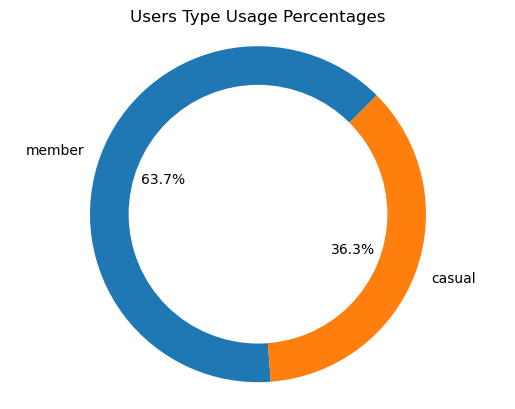

In [21]:
# using a pie chart to show the users tyoes percentages

labels = users_summary.index.tolist()

plt.pie(users_summary['Count'],labels=labels,autopct='%.1f%%',startangle=45)

centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Users Type Usage Percentages')
plt.show()

- most of the users are **members** which is a good sign

## 5.2 Step 2: Calculate the count and percentage of each rideable_type.

In [22]:
# comparing the rideable types

rideable_counts = data['rideable_type'].value_counts()
rideable_percentages = round(data['rideable_type'].value_counts(normalize=True) * 100,2)

# You can also combine them into a single DataFrame for better presentation
rideable_summary = pd.DataFrame({
    'Count': rideable_counts,
    'Percentage': rideable_percentages
})
print("Count and Percentage of each rideable_type:\n")
rideable_summary.head()

Count and Percentage of each rideable_type:



,Count,Percentage
rideable_type,,
electric_bike,2839672,50.18
classic_bike,2683484,47.42
electric_scooter,135495,2.39


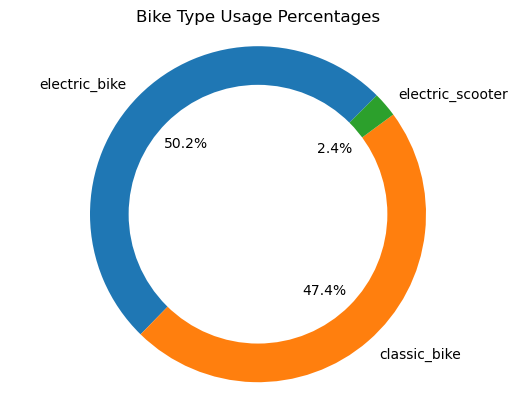

In [23]:
# using a pie chart to show the rideable tyoes percentages

labels = rideable_summary['Count'].index.tolist()

plt.pie(rideable_summary['Count'],labels=labels,autopct='%.1f%%',startangle=45)

centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Bike Type Usage Percentages')
plt.show()

- Here we found out that electric bikes takes on **roughly 50%** of the bikes transactions.
- **classic** bikes not far behind at **almost 47%**.
- also small percentage to the **electric scooter users**.

## 5.3 Step 3: Investigate if member vs. casual riders have different preferences for ride types.

In [24]:
# analysing type of bikes used by each type of users

# calculating the number of rides for each type of user for each type of bike
count_by_bike = pd.pivot_table(data=data,
                                index=['member_casual','rideable_type'],
                                values=['ride_id'],
                                aggfunc='count')

count_by_bike

ride_id
member_casual rideable_type            
casual        classic_bike       950642
              electric_bike     1022598
              electric_scooter    80229
member        classic_bike      1732842
              electric_bike     1817074
              electric_scooter    55266

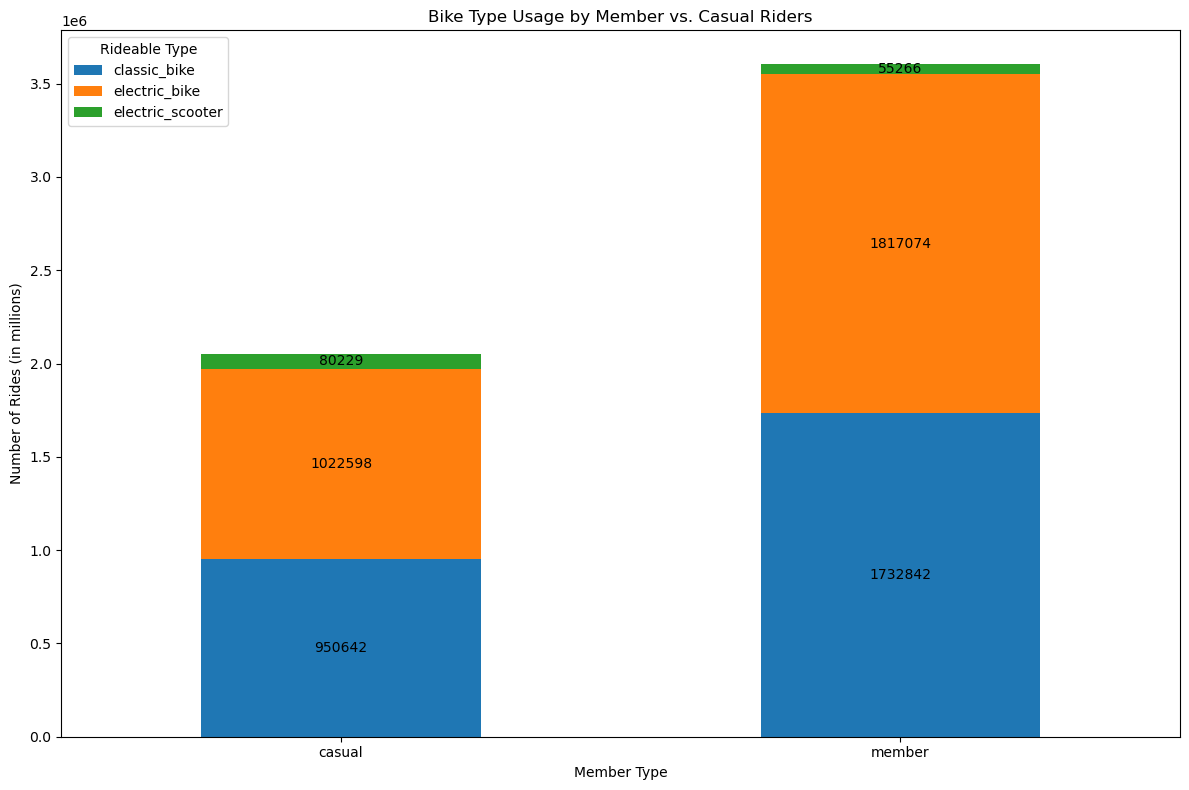

In [25]:
# Unstack the pivot table
bike_usage_unstacked = count_by_bike.unstack(level='rideable_type')

# Plot the stacked bar chart, accessing the 'ride_id' column level
ax = bike_usage_unstacked['ride_id'].plot(kind='bar', stacked=True, figsize=(12, 8)) 

# Add labels and title
plt.xlabel('Member Type')
plt.ylabel('Number of Rides (in millions)')
plt.title('Bike Type Usage by Member vs. Casual Riders')
plt.xticks(rotation=0)

# Add a legend
plt.legend(title='Rideable Type')

# Function to add labels to each segment of the stacked bar
def add_labels(ax, data):
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fmt='%.0f')

# Add labels to the bars
add_labels(ax, bike_usage_unstacked['ride_id'])

# Show the plot
plt.tight_layout()
plt.show()

- we have more **member** users than the **causal** ones.
- moreover the usage of **electric bikes** is more than the **classic ones** on both types of users.
- **so let's dig in an Investigate the time trends ( Monthly - Weekday - Hourly )** :-

## 5.4 Step 4: Monthly Trends: Analyze the number of rides per Month, Visualize with line plot

In [26]:
# calculating the number of rides for each type of user at each month
# # calculating the number of rides for each type of user at each month

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

by_month = pd.pivot_table(data=data,
                          index=['Month', 'member_casual'],
                          values=['ride_id'],
                          aggfunc='count')

# Convert 'Month' index level to a categorical type with the desired order
by_month = by_month.reset_index()
by_month['Month'] = pd.Categorical(by_month['Month'], categories=month_order, ordered=True)
by_month_sorted = by_month.sort_values(by=['Month', 'member_casual']).set_index(['Month', 'member_casual'])

by_month_sorted

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\4279057852.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  by_month = pd.pivot_table(data=data,


ride_id
Month     member_casual         
January   casual           23397
          member          115012
February  casual           45523
          member          171013
March     casual           79381
          member          212045
April     casual          125843
          member          273795
May       casual          219964
          member          366637
June      casual          286159
          member          398573
July      casual          305264
          member          418152
August    casual          303517
          member          426149
September casual          329887
          member          461093
October   casual          207828
          member          390857
November  casual           89732
          member          236165
December  casual           36974
          member          135691

In [27]:
fig_2 = data.groupby(['Month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

fig = px.line(fig_2, x = 'Month', y = 'ride_id', range_y = [0,600000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'Month': 'Months (Jan 2024 - Dec 2024)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'Month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# Add title
fig.update_layout(title='Count of Ride Duration by Month for Each Membership Type')

# Show the plot
fig.show()

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\1166848467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fig_2 = data.groupby(['Month', 'member_casual'], as_index=False).count()


- from this graph we found out that both types of **users** and their usage of the product is similiar with similar month peaks from **August** to mid of **September**.
- at the **beginning** of the year and at the end the number of rides tend to **decline**

## 5.5 Step 5: Daily Trends: Examine the number of rides at each Weekday, Visualize with line plot

In [28]:
# Investigate the number of rides per weekday
by_weekday = pd.pivot_table(data=data,
                            index='member_casual',
                            values=['duration'],
                            columns='Weekday',
                            aggfunc='count')
by_weekday.head()

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\269985522.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



duration                                                    
Weekday         Monday Tuesday Wednesday Thursday  Friday Saturday  Sunday
member_casual                                                             
casual          242730  223032    258035   253726  301584   423009  351353
member          520140  555433    593624   555525  510957   464855  404648

In [29]:
fig_2 = data.groupby(['Weekday', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

fig = px.line(fig_2, x = 'Weekday', y = 'ride_id', range_y = [0,700000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'Month': 'Months (Jan 2024 - Dec 2024)', 'Weekday': 'Weekday'},
        hover_name = 'member_casual', hover_data = {'Weekday': False, 'Month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# Add title
fig.update_layout(title='Count of Ride Duration by Weekday for Each Membership Type')

# Show the plot
fig.show()

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\1766577840.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- the number of rides of the **member** users tend to **decline** at the weekends.
- the number of rides of the **casual** users tend to **rise** at the weekends.
### this could lead to a conclusion of :-
1. **member** users tend to use bikes on the **workdays** of the week to go for **work**.
2. **casual** users tend to use bikes on the **holidays and weekends** as an entertainment. 

## 5.6 Step 6: Hourly Trends: Investigate the number of rides per Hour, Visualize with line plot

In [30]:
# Investigate the number of rides per Hour
by_month = pd.pivot_table(data=data,
                            index='member_casual',
                            values=['ride_id'],
                            columns='Hour',aggfunc='count')
by_month

ride_id                                                   \
Hour               0      1      2     3     4      5       6       7    
member_casual                                                            
casual          33330  22298  13816  7676  6059  11648   27757   51676   
member          31369  19225  10861  7463  8398  33681  101139  195472   

                               ...                                          \
Hour               8       9   ...      14      15      16      17      18   
member_casual                  ...                                           
casual          73171   73476  ...  147404  162210  183105  195468  166394   
member         249098  168896  ...  199167  244419  334400  383750  298617   

                                                     
Hour               19      20      21     22     23  
member_casual                                        
casual         122407   89324   73973  64551  45253  
member         208946  146374  112314  81174  51063  

[2 rows x 24 columns]

In [31]:
# Investigate the number of rides per Hour and plotting graph it over the day
fig_2 = data.groupby(['Hour', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

fig = px.line(fig_2, x = 'Hour', y = 'ride_id', range_y = [0,400000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'Hour': 'Hours (Jan 2024 - Dec 2024)', 'Hour': 'Hour'},
        hover_name = 'member_casual', hover_data = {'Weekday': False, 'Month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# Add title
fig.update_layout(title='Count of Ride Duration by Hour for Each Membership Type')

# Show the plot
fig.show()

- this line graph just approve our conclusion that the **member** users us it mostly as a **transportation to work** rather thant **casual** members who use it mostly as an **entertainment**

## 5.7 Step 7: Ride Duration Analysis.

In [32]:
data["duration"].describe().apply(lambda x: format(x, 'f'))

count    5658651.000000
mean          16.870704
std           14.867274
min            2.000000
25%            6.000000
50%           11.000000
75%           23.000000
max           59.000000
Name: duration, dtype: object

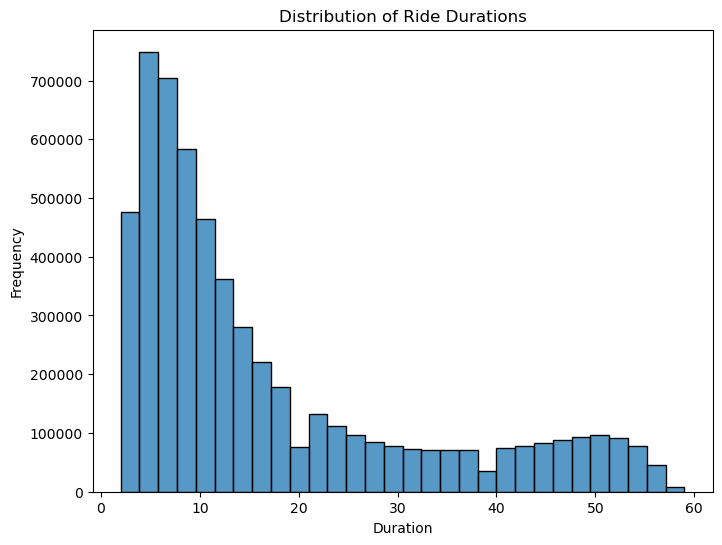

In [33]:
# Visualize the distribution of ride durations using histograms
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='duration', bins=30)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

- this destribution tells us that more users **(about 50%)** tend to use the bikes **less than 11 minutes** which is the **median**.  

## 5.8 Step 8: Average Ride Duration Analysis by types of membership.

In [34]:
# analysing the duration usage per membership type and rideable types

# calculating the mean duration of rides per each category
avg_duration = pd.pivot_table(data=data,
                                index='member_casual',
                                values=['duration'],
                                aggfunc='mean')


np.round(avg_duration,2)

,duration
member_casual,
casual,18.42
member,15.99


C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\3119753052.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




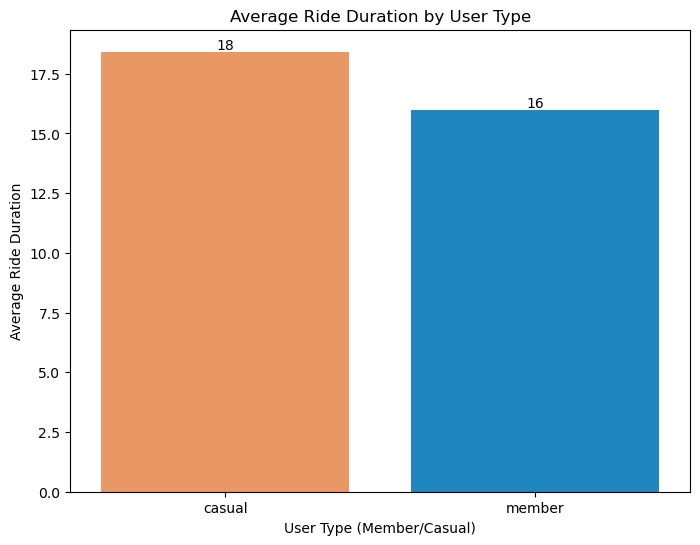

In [35]:
# Calculate the mean duration for each member_casual type
user_type_duration = avg_duration.groupby(level='member_casual')['duration'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x='member_casual', y='duration', data=user_type_duration,  palette=['#FF934F', '#058ED9'])
plt.title('Average Ride Duration by User Type')
plt.xlabel('User Type (Member/Casual)')
plt.ylabel('Average Ride Duration')

# Add the mean duration values as text on the bars
for index, value in user_type_duration.iterrows():
    plt.text(index, value['duration'] + 0.1, f"{value['duration']:.0f}", ha='center')  # Adjust vertical offset (0.1) as needed

# Show the plot
plt.show()

- average time usage for **casual** members is heigher than **members** by 2 minutes per ride.

## 5.9 Step 9: Average Ride Duration Analysis by types of membership for each rideable type.

In [36]:
# analysing the duration usage per membership type and rideable types

# calculating the mean duration of rides per each category
avg_duration_bike_types = pd.pivot_table(data=data,
                                index=['member_casual'],
                                values=['duration'],
                                columns='rideable_type',
                                aggfunc=np.mean)

np.round(avg_duration_bike_types,2)

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\4214327297.py:4: FutureWarning:

The provided callable <function mean at 0x0000025595A1B920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



duration                               
rideable_type classic_bike electric_bike electric_scooter
member_casual                                            
casual               19.87         17.27            15.90
member               16.44         15.63            13.79

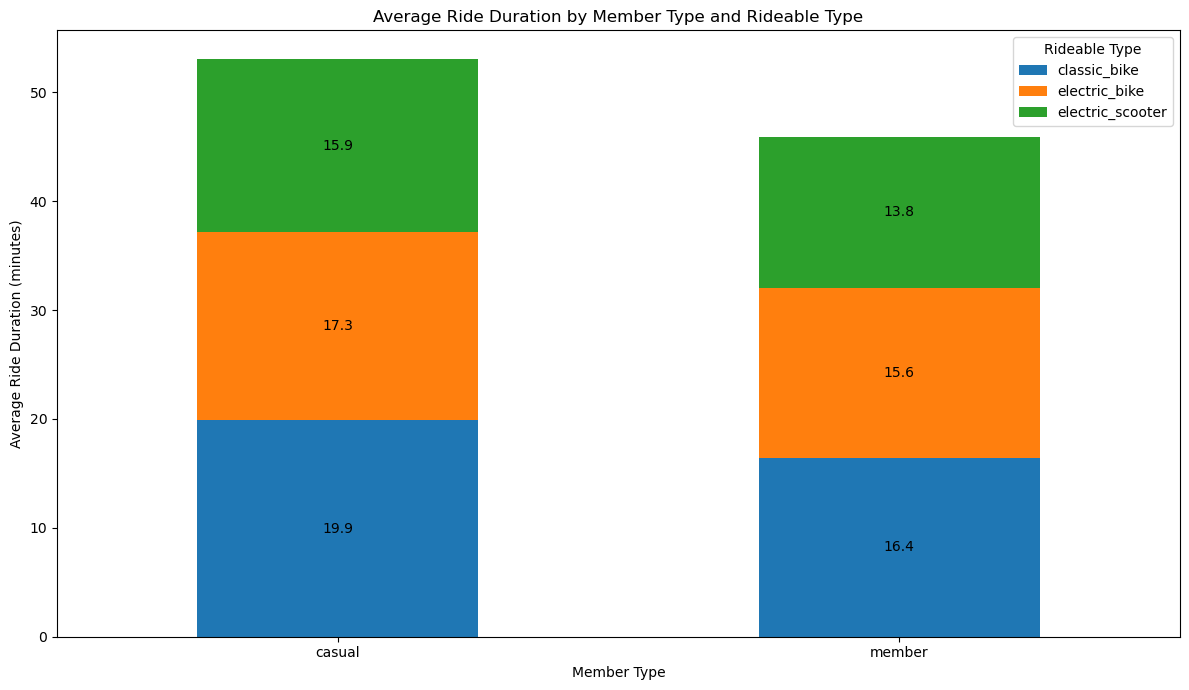

In [37]:
# Plot the stacked bar chart of mean duration at each membershtip type and rideable types
ax = avg_duration_bike_types['duration'].plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.xlabel('Member Type')
plt.ylabel('Average Ride Duration (minutes)')  # Corrected y-axis label
plt.title('Average Ride Duration by Member Type and Rideable Type') # Corrected Title
plt.xticks(rotation=0)
plt.legend(title='Rideable Type')

# Improved label function
def add_labels_stacked(ax, data):
    for bar in ax.containers:
        labels = [f'{v:.1f}' if v > 0 else '' for v in bar.datavalues] #more control on label
        ax.bar_label(bar, labels=labels, label_type='center')

# Add labels
add_labels_stacked(ax, avg_duration['duration'])

# Show the plot
plt.tight_layout()
plt.show()


- for each ridable type the **averege ride** time is higher in causual users than members.

## 5.10 Step 10: Average Ride Duration Analysis by types of membership for each Month.

In [38]:
# analysing the duration usage per membership type and rideable types

# calculating the mean duration of rides per each category
avg_month_duration = pd.pivot_table(data=data,
                                index=['member_casual'],
                                values=['duration'],
                                columns='Month',
                                aggfunc='mean')

np.round(avg_month_duration,2)

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\1417372922.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



duration                                                     \
Month          January February  March  April    May   June   July August   
member_casual                                                               
casual           14.94    16.88  17.70  18.21  19.02  19.29  19.21  18.96   
member           14.39    15.22  15.24  15.63  16.56  16.94  16.80  16.59   

                                                   
Month         September October November December  
member_casual                                      
casual            17.96   17.90    16.38    15.42  
member            16.00   15.67    14.85    14.32

In [39]:
#Average Ride Duration by Month for each Membership Type (Line Chart)

# Calculate the mean duration for each member_casual group, aggregated by 'Month'
fig_2 = data.groupby(['Month', 'member_casual'], as_index=False)['duration'].mean()

# Create the line chart using Plotly Express
fig = px.line(
    fig_2,
    x='Month',
    y='duration',
    color='member_casual',
    line_shape='spline',
    markers=True,
    labels={'duration': 'Average Duration', 'Month': 'Month', 'member_casual': 'Membership Type'},
    hover_name='member_casual',
    hover_data={'Month': True, 'duration': True},
    color_discrete_map={'casual': '#FF934F', 'member': '#058ED9'},
    range_y = [0, fig_2['duration'].max() * 1.1]
)

# Add title 
fig.update_layout(title='Average Ride Duration by Month and Membership Type')

# Show the plot
fig.show()


C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\496887531.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [40]:
# analysing the duration usage per membership type and rideable types

# calculating the mean duration of rides per each category
avg_month_duration = pd.pivot_table(data=data,
                                index=['member_casual'],
                                values=['duration'],
                                columns='Weekday',
                                aggfunc='mean')

np.round(avg_month_duration,2)

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\2896614168.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



duration                                                  
Weekday         Monday Tuesday Wednesday Thursday Friday Saturday Sunday
member_casual                                                           
casual           17.81   17.41     17.68    17.62  18.29    19.54  19.37
member           15.52   15.65     15.83    15.77  15.88    16.89  16.70

In [41]:
#Average Ride Duration by Weekday for each Membership Type (Line Chart)

# Calculate the mean duration for each member_casual group, aggregated by 'Month'
fig_2 = data.groupby(['Weekday', 'member_casual'], as_index=False)['duration'].mean()

# Create the line chart using Plotly Express
fig = px.line(
    fig_2,
    x='Weekday',
    y='duration',
    color='member_casual',
    line_shape='spline',
    markers=True,
    labels={'duration': 'Average Duration', 'Weekday': 'Weekday', 'member_casual': 'Membership Type'},
    hover_name='member_casual',
    hover_data={'Weekday': True, 'duration': True},
    color_discrete_map={'casual': '#FF934F', 'member': '#058ED9'},
    range_y = [0, fig_2['duration'].max() * 1.1]
)

# Add title 
fig.update_layout(title='Average Ride Duration by Weekday for each Membership Type')

# Show the plot
fig.show()

C:\Users\SIGMA\AppData\Local\Temp\ipykernel_12504\1572877148.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [42]:
# analysing the duration usage per membership type and rideable types

# calculating the mean duration of rides per each category
avg_month_duration = pd.pivot_table(data=data,
                                index=['member_casual'],
                                values=['duration'],
                                columns='Hour',
                                aggfunc='mean')

np.round(avg_month_duration,2)

duration                                                         \
Hour                0      1      2      3      4      5     6      7      8    
member_casual                                                                   
casual           15.72  16.39  15.09  16.02  15.19  15.97  16.3  16.97  16.17   
member           14.21  14.10  14.01  15.36  16.88  16.61  16.4  16.79  15.24   

                      ...                                                   \
Hour              9   ...     14     15     16     17     18     19     20   
member_casual         ...                                                    
casual         17.72  ...  19.53  19.51  19.26  18.68  18.33  17.75  17.74   
member         14.76  ...  16.26  16.65  17.22  16.43  15.96  15.49  15.63   

                                    
Hour              21     22     23  
member_casual                       
casual         17.81  17.44  16.71  
member         15.54  15.23  14.87  

[2 rows x 24 columns]

In [43]:
#Average Ride Duration by Weekday for each Membership Type (Line Chart)

# Calculate the mean duration for each member_casual group, aggregated by 'Month'
fig_2 = data.groupby(['Hour', 'member_casual'], as_index=False)['duration'].mean()

# Create the line chart using Plotly Express
fig = px.line(
    fig_2,
    x='Hour',
    y='duration',
    color='member_casual',
    line_shape='spline',
    markers=True,
    labels={'duration': 'Average Duration', 'Hour': 'Hour', 'member_casual': 'Membership Type'},
    hover_name='member_casual',
    hover_data={'Hour': True, 'duration': True},
    color_discrete_map={'casual': '#FF934F', 'member': '#058ED9'},
    range_y = [0, fig_2['duration'].max() * 1.1]
)

# Add title 
fig.update_layout(title='Average Ride Duration by Hour for each Membership Type')

# Show the plot
fig.show()

In [44]:
member_duration = data[data['member_casual'] == 'member']['duration']
casual_duration = data[data['member_casual'] == 'casual']['duration']
t_stat, p_value = stats.ttest_ind(member_duration, casual_duration)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -187.53483373820038, P-value: 0.0
